## Credit Card Fraud Detection - Case Study

## Opis danych
Pochodzenie danych: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Kradzieże kart kredytowych to wciąż poważny globalny problem, który powoduje znaczące straty dla firm, banków czy zwykłych ludzi. Wraz ze wzrostem płatności dokonywanych cyfrowo, oszuści mają więcej okazji by wykorzystać luki w bezpieczeństwie i wykraść ważne informacje. Dana kradzież nie oznacza jedynie strat materialnych, ale również wizerunkowe dla instytucji finansowych i zmniejsza zaufanie klientów. Wykrycie i zapobieganie kradzieży kart kredytowych jest bardzo ważne w celu zminimalizowania jej negatywnego wpływu. W tym celu doskonale sprawdzą się algorytmy uczenia maszynowego do zidentyfikowania podejrzanych transakcji.

Wybrany zbiór danych przedstawia ważny problem, z którym codziennie zmagają się firmy zajmujące się wydawaniem kart kredytowych. Posłuży on do predykcji transakcji dokonywanych przy użyciu kradzionych kart kredytowych. Zbudowany w ten sposób model pozwoli na nieobciążanie rachunku klienta, jeśli dana transakcja została zainicjowana przy użyciu kradzionej karty kredytowej.

Zbiór danych zawiera transakcje wykonane przy użyciu kart kredytowych w ciągu 2 dni we wrześniu 2013 roku przez Europejczyków. Łączna liczba transakcji w zbiorze to 284807 transakcje. Ważnym problemem jest fakt, że dane dotyczące wykrycia kradzieży są wysoce-niezbalansowane. Liczba nielegalnych transakcji jest znacznie mniejsza niż liczba poprawnych tranakcji. W takiej sytuacji, klasyczne algorytmy uczenia maszynowego słabo radzą sobie z wykrywaniem przypadków należących do klasy mniejszościowej (nielegalne transakcje). Wyzwanie polega więc na zbudowaniu takich modeli, które będą w stanie dokładnie zidentyfikować podejrzane przypadki płatności. Niezbalansowanie danych stanowi znaczne utrudnienie w osiągnięciu właściwego celu, jako że większość klasyfikatorów jest stworzonych w celu maksymalizacji dokładności, która nie jest właściwą metryką w takich przypadkach.

## Eksploracyjna analiza danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('creditcard.csv')
# df = df.drop('id', axis=1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Przykładowy wiersz składa się z 30 atrybutów warunkowych, z czego aż 28 jest wynikiem zastosowania transformacji PCA w ramach preprocessingu. Ze względu na charakter tej metody, nie jesteśmy w stanie uzyskać lepszego kontekstu dla tych atrybutów. Poza tymi atrybutami wyróżniamy również atrybuty 'Time' oraz 'Amount'. Atrybut 'Time' określa czas upływający w sekundach pomiędzy daną transakcją a pierwszą transakcją w zbiorze. Nie ma on większego znaczenia w kontekście badanego problemu (pełni rolę pewnego atrybutu porządkowego). 'Amount' z kolei określa kwotę transakcji, którą będzie obciążony posiadacz karty. Atrybutem decyzyjnym jest flaga, która określa, czy dana transakcja została wykonana przy użyciu karty kupującego (0) czy przy użyciu kradzionej karty (1).

### Tabela rozkładu wartości poszczególnych atrybutów

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Powyższa tabela pokazuje rozkład wartości, w tym takie charakterystyczne cechy jak np. średnia i odchylenie standardowe, przyjmowane przez poszczególne atrybuty. Jedyną istotną informację niesie ze sobą, poza wspomnianym wcześniej niezbalansowaniem atrybutu decyzyjnego, rozkład atrybutu warunkowego 'Amount'. 75% wartości tego atrybutu osiąga wartości mniejsze niż 77,17. Większość dokonywanych transakcji jest niskobudżetowych, a wśrod nich wiele potencjalnych kradzieży, ze względu na słabsze zabezpieczenia dla takowych operacji.

In [4]:
total = df.isna().sum().sort_values(ascending=False)
total.head()

Time      0
V16       0
Amount    0
V28       0
V27       0
dtype: int64

Analiza brakujących wartości - brak takowych w badanym zbiorze.

### Wykresy pudełkowe zawierające kwotę i klasę decyzyjną

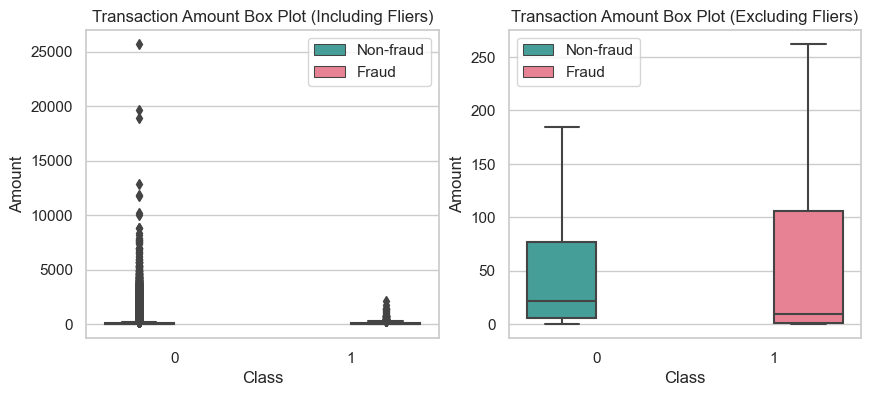

In [6]:
colors = ['#36ada4', '#f77189']

fig, ax = plt.subplots(ncols=2, figsize=(10,4))


sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=colors,
            showfliers=False,
            ax=ax[1])
sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(colors)
)

# Add titles to the plots
ax[0].set_title("Transaction Amount Box Plot (Including Fliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Fliers)")

# Update legend labels
legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)


plt.show()

Wnioski:
- nielegalne transakcje posiadają niższą wartość mediany
- nielegalne transakcje mają również większy rozstęp międzykwartylowy
- nie istnieją transakcje kradzionymi kartami o kwotach powyżej 3000 więc jest mało prawdopodobne aby duże transakcje odbywały się kradzionymi kartami (np. ze względu na limity płatności kartą bez znajomości kodu PIN).

### Wykres punktowy kwoty od czasu

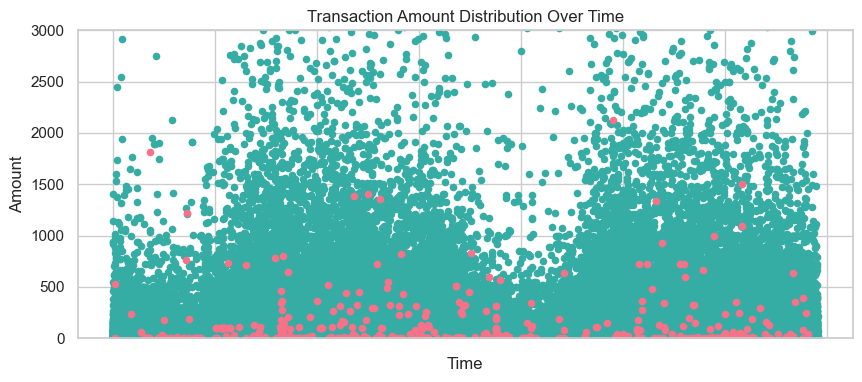

In [7]:
f, ax = plt.subplots(figsize=(10, 4))

sns.scatterplot(data=df.loc[df.Class==0], 
                x='Time', 
                y='Amount', 
                color='#36ada4',
                s=30,
                alpha=1,
                linewidth=0)

ax.set(xlabel=None, xticklabels=[])
plt.ylim(0, 3000)


sns.scatterplot(data=df.loc[df.Class==1], 
                x='Time', 
                y='Amount', 
                color='#f77189',
                s=30,
                alpha=1,
                linewidth=0)
plt.ylim(0, 3000)

# Add title to the plot
ax.set_title("Transaction Amount Distribution Over Time")

plt.show()

Wnioski:
- jak można zauważyć na wykresie kwoty od czasu dokonania transakcji, nielegalne transakcje występują równomiernie pomiędzy legalnymi transakcjami - brak wyraźnego związku

### Wykresy KDE porównujące rozkłady wszystkich atrybutów dla każdej klasy

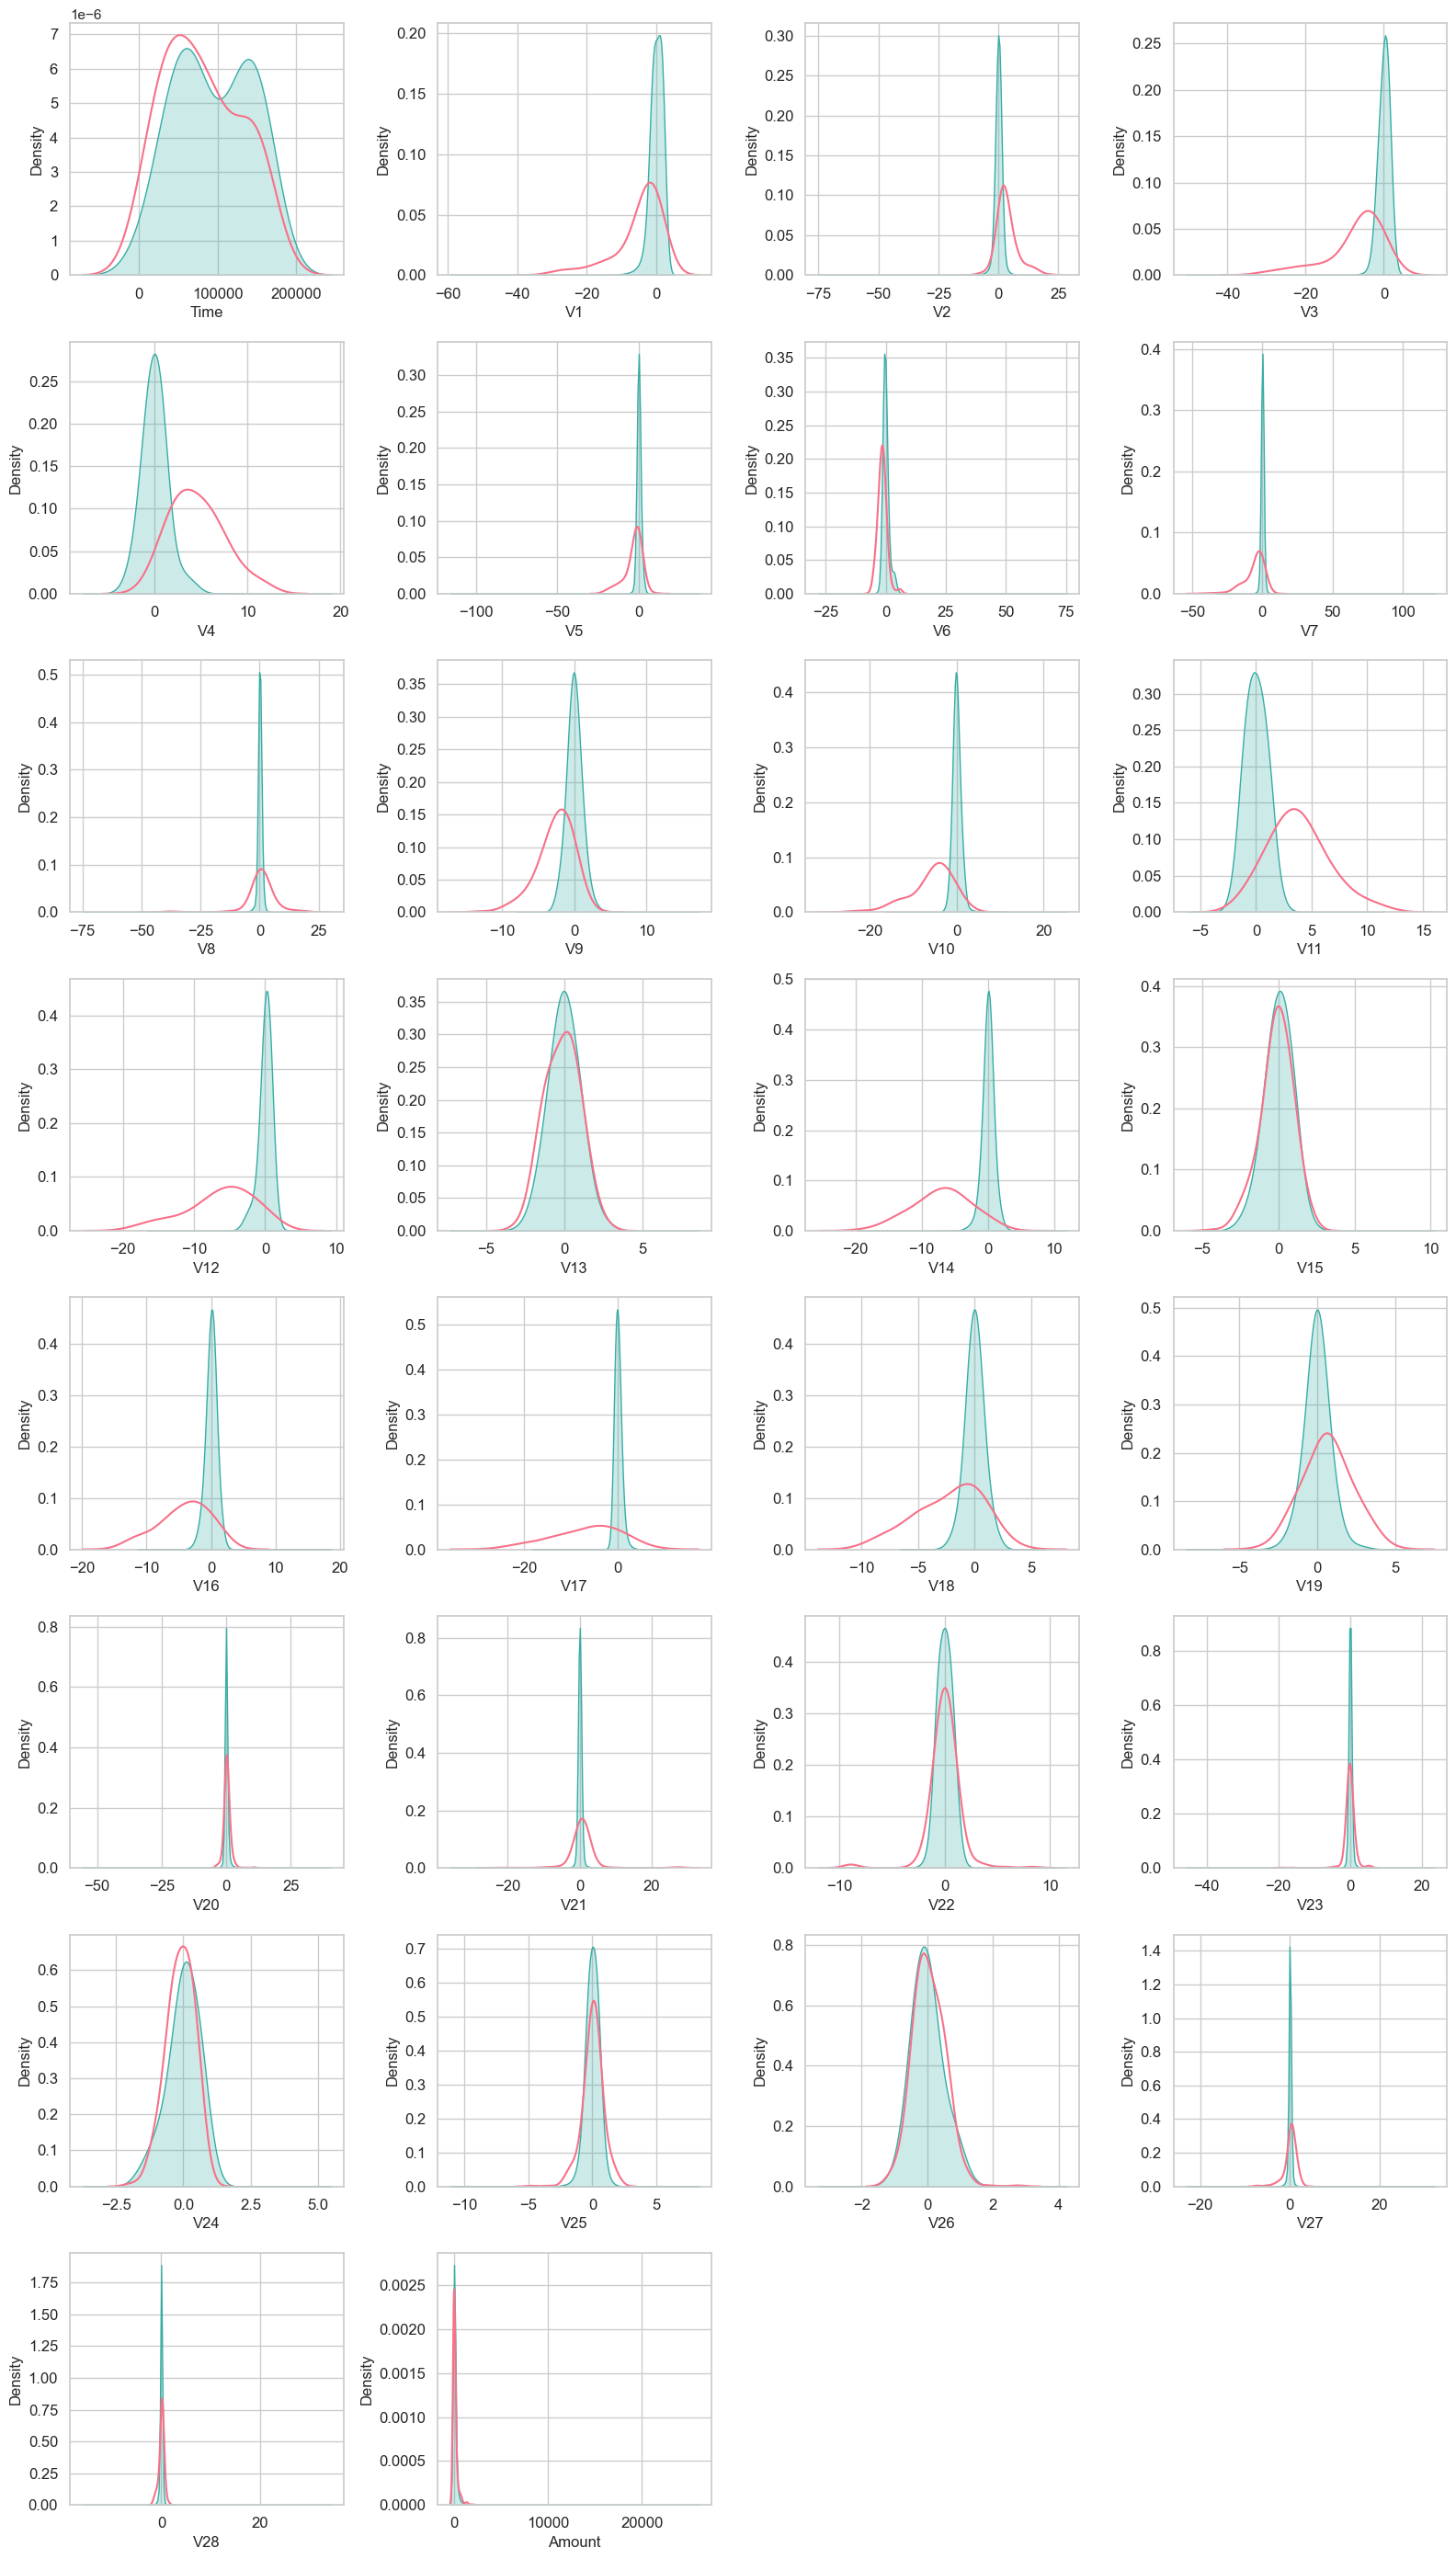

In [8]:
var = df.columns.values

t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

num_features = len(var)
num_rows = num_features // 4 + int(num_features % 4 != 0)

fig, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 28))

for idx, feature in enumerate(var):
    row = idx // 4
    col = idx % 4
    
    sns.kdeplot(t0[feature], bw_method=0.5, label="Class = 0", color='#36ada4', fill=True, warn_singular=False, ax=ax[row, col])
    sns.kdeplot(t1[feature], bw_method=0.5, label="Class = 1", color='#f77189', warn_singular=False, ax=ax[row, col])
    
    ax[row, col].set_xlabel(feature, fontsize=12)
    ax[row, col].tick_params(axis='both', which='major', labelsize=12)

# Remove any unused subplots + class
for remaining_ax in ax.flatten()[num_features-1:]:
    remaining_ax.remove()    
    
plt.tight_layout()
plt.show()

Wnioski:
- Dla niektórych z atrybutów rozkłady są niemal identyczne między legalnymi a nielegalnymi transakcjami
- Inne atrybuty mają wyraźne różnice w średniej i spłaszczeniu, co może być użyteczne w predykcjach.

Ze względu na różne rozkłady poszczególnych atrybutów, każdy z nich zostanie poddany standaryzacji w procesie budowania modelu. Można zauważyć liczne obserwacje odstające dla atrybutu 'Amount', zwłaszcza dla grupy zaklasyfikowanej jako transakcje legalne. 

In [19]:
display(pd.DataFrame(df['Class'].value_counts()).reset_index())
display(pd.DataFrame(df['Class'].value_counts(normalize=True) * 100).reset_index())

,Class,count
0,0,284315
1,1,492


,Class,proportion
0,0,99.827251
1,1,0.172749


Jak można zauważyć, dane są mocno niezbalansowane. Tylko ok. 0,17% przypadków zostało sklasyfikowanych jako transakcje skradzioną kartą w podanym zbiorze.

### Macierz korelacji

<Axes: >

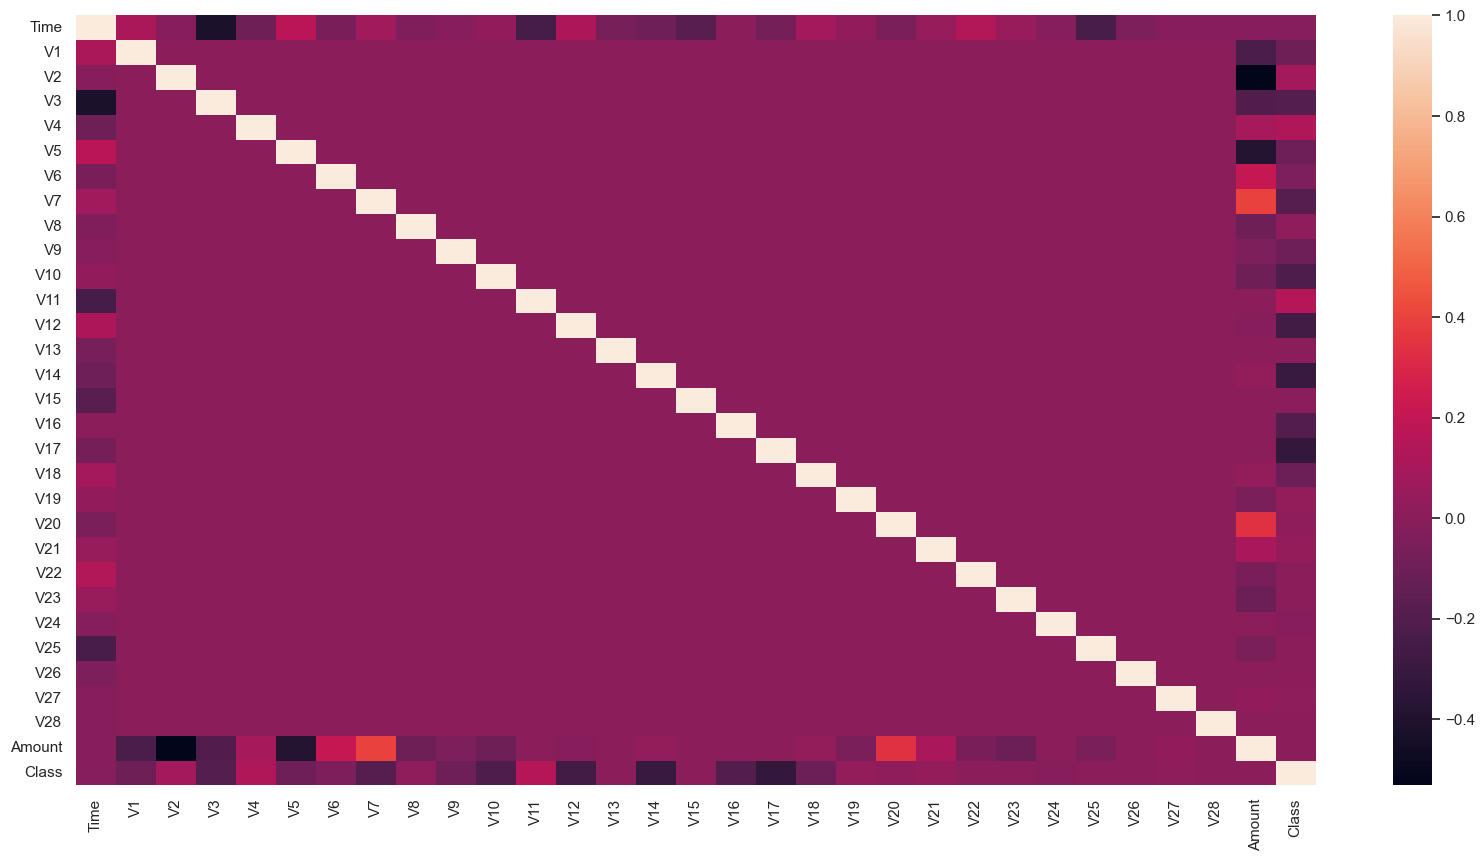

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr())

Wnioski:
- Atrybuty PCA nie są skorelowane ze sobą
- Większosć atrybutów PCA słabo koreluje z czasem transakcji czy też kwotą

## Budowa modelu
Do budowy końcowego modelu posłużę się trzema dostępnymi klasyfikatorami:

1. LogisticRegression
2. RandomForestClassifier
3. GaussianNB

Wykonanie predykcji posługując się powyższymi algorytmami będzie prostym przepływem, poprzedzonym standaryzacją danych. Z uwagi na wysoki stopień niezbalansowania danych, konieczne będzie zastosowanie technik poprawiających zdolności predykcyjne poszczególnych modeli. Dla metod posiadających parametr *class_weight*, ustawienie jego wartości na 'balanced' poprawi jakość predykcji. Z kolei dla metody GaussianNB w tym celu wykorzystam oversampling przy wykorzystaniu metody SMOTE. Metrykami służacymi do oceny trafności poszczególnych modeli będą tradycyjna trafność, G-mean oraz ROC AUC. Wyznaczając końcowy model skorzystam z podejścia ensemble learning, służącego do połączenia testowanych modeli oraz stworzenia jednego optymalnego modelu predykcyjnego.

Wykorzystane metryki:
* trafność (accuracy) - liczba poprawnych / liczba wszystkich predykcji. Siłą tej metryki będzie niski stopień transakcji odrzuconych. Z drugiej strony ignoruje ona prawdziwie nielegalne transkacje. Z tego powodu stanowi dobry benchmark, jednak nie jest właściwą metryką dla specyfiki danych niezbalansowanych.
* precyzja (precision) - liczba odgadniętych poprawnie / łączna liczba wszystkich predykcji. Określa jaka część wyników wskazanych przez klasyfikator jako dodatnie (transakcje nielegalne) jest faktycznie dodatnia. Jej siła polega na właściwej identyfikacji nielegalnych transakcji.
* czułość (recall) - liczba wyłapanych nielegalnych transakcji / łączna liczba nielegalnych transakcji. Określa jaką część dodatnich wyników wykrył klasyfikator. 
* średnia geometryczna (G-mean) - metryka, która maksymalizuje dokładność dla każdej klasy, trzymając te dokładności zbalansowane. Dla klasyfikacji binarnej G-mean jest pierwiastkiem kwadratowym iloczynu czułości (sensitivity, recall) i swoistości (specifity), która określa jaką część ujemnych (niedodatnich) wyników wykrył klasyfikator.
* pole pod krzywą ROC (ROCAUC) - krzywe ROC to wizualizacja zależności pomiędzy skutecznością klasyfikacji pozytywnych (czułość) a nieskutecznością klasyfikacji przypadków negatywnych (1 - swoistość). Bardzo popularnym podejściem jest wyliczanie pola pod wykresem krzywej ROC, oznaczanego jako AUC (ang. area under curve), i traktowanie go jako miarę dobroci i trafności danego modelu. Wartość wskaźnika AUC przyjmuje wartości z przedziału [0; 1]; im większa, tym lepszy model.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Class", "Time"]), df["Class"], test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Regresja logistyczna

In [22]:
results = []
lr_clf = LogisticRegression(penalty='l2', class_weight='balanced', random_state=42, max_iter=200)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
results.append(dict(name='Logistic Regression', acc=accuracy_score(y_test, y_pred), gmean=geometric_mean_score(y_test, y_pred), 
                    rocauc=roc_auc_score(y_test, y_pred), precision=precision_score(y_test, y_pred), recall=recall_score(y_test, y_pred)))

* Las losowy

In [23]:
rf_clf = RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
results.append(dict(name='Random Forest', acc=accuracy_score(y_test, y_pred), gmean=geometric_mean_score(y_test, y_pred), 
                    rocauc=roc_auc_score(y_test, y_pred), precision=precision_score(y_test, y_pred), recall=recall_score(y_test, y_pred)))

* Naiwny Bayes

W podejściu dla klasyfikatora GaussianNB nie można wykorzystać dostosowania wag odwrotnie częstotliwości wysepowania danej klasy ze względu na charakter tej metody. W tym celu wykorzystam metodę nadpróbkowania SMOTE. Metoda ta generuje sztuczne przykłady z klasy mniejszościowej w celu odpowiedniego zrównoważenia występowania przykładów z obu klas.

In [24]:
oversample = SMOTE(sampling_strategy="minority", random_state=4)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Class
0    213226
1    213226
Name: count, dtype: int64

In [25]:
nb_clf = GaussianNB()
nb_clf.fit(X_train_smote, y_train_smote)
y_pred = nb_clf.predict(X_test)
results.append(dict(name='Naive Bayes', acc=accuracy_score(y_test, y_pred), gmean=geometric_mean_score(y_test, y_pred), 
                    rocauc=roc_auc_score(y_test, y_pred), precision=precision_score(y_test, y_pred), recall=recall_score(y_test, y_pred)))

In [26]:
results = pd.DataFrame(results)
results

,name,acc,gmean,rocauc,precision,recall
0,Logistic Regression,0.975268,0.947455,0.947854,0.056034,0.920354
1,Random Forest,0.999508,0.862149,0.871639,0.933333,0.743363
2,Naive Bayes,0.976841,0.920501,0.922136,0.056582,0.867257


* Ensemble learning

In [27]:
lr_pred = lr_clf.predict_proba(X_test)[:, 1]
rf_pred = rf_clf.predict_proba(X_test)[:, 1]
nb_clf = nb_clf.predict_proba(X_test)[:, 1]

coefficients = [1, 0.1, 0.1]
ensemble_preds = np.sum([coefficients[0] * lr_pred + coefficients[1] * rf_pred + coefficients[2] * nb_clf], axis=0) / sum(coefficients)

* Ewaluacja modelu

In [28]:
results = [dict(name='Ensemble method', acc=accuracy_score(y_test, (ensemble_preds > 0.5)), gmean=geometric_mean_score(y_test, (ensemble_preds > 0.5)),
                rocauc=roc_auc_score(y_test, y_pred), precision=precision_score(y_test, y_pred), recall=recall_score(y_test, y_pred))]

In [29]:
pd.DataFrame(results)

,name,acc,gmean,rocauc,precision,recall
0,Ensemble method,0.982824,0.951124,0.922136,0.056582,0.867257


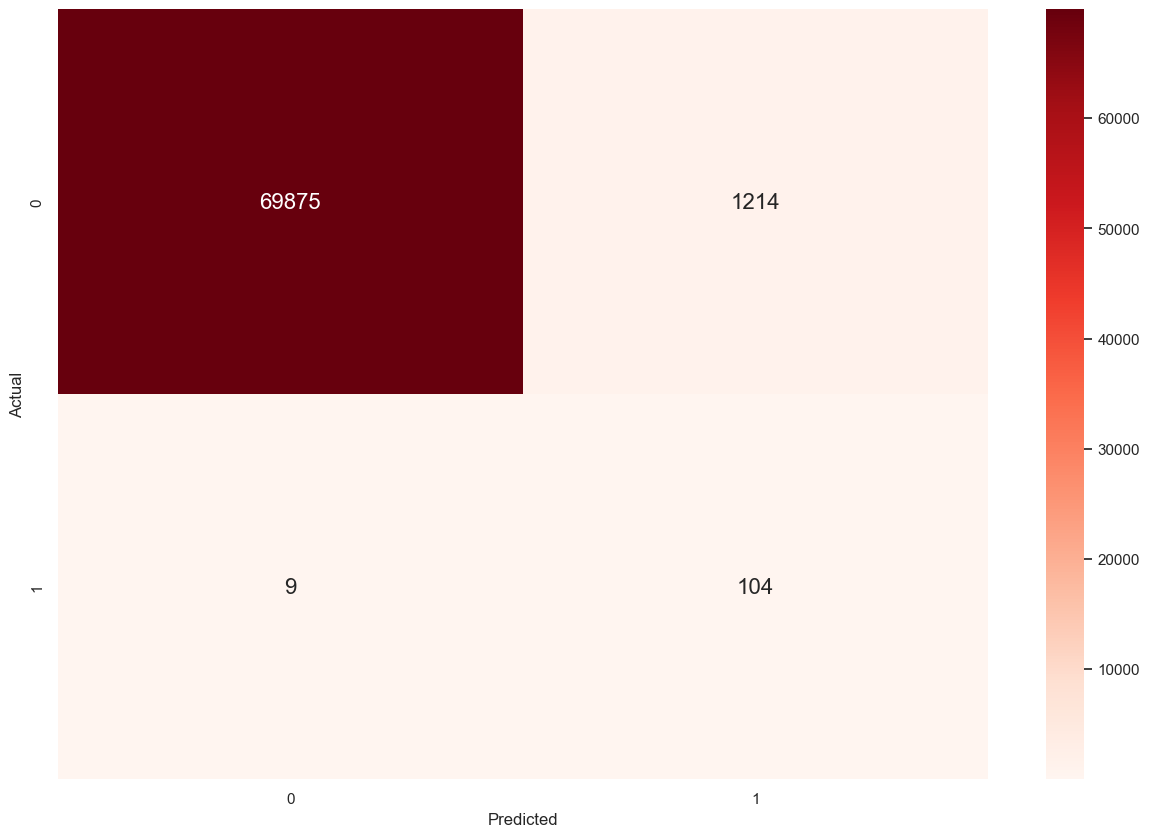

In [30]:
cm = confusion_matrix(y_test, (ensemble_preds > 0.5))
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

W końcowym modelu uznałem, że regresja logistyczna najlepiej poradziła sobie z problemem niezrównoważenia atrybutu decyzyjnego w podanym zbiorze, dlatego jej współczynnik jest 10-krotnie wyższy. Końcowy model to przykład zastosowania ensemble learning z wykorzystaniem średniej ważonej. Ze względu na fakt, że błąd polegający na wykryciu niestniejącej kradzieży i anulowanie transakcji jest mniej kosztowny niż potencjalny brak wykrycia kradzieży karty, uzyskane wyniki predykcji wydają się satysfakcjonujące. Problem niezbalansowanych danych został więc rozwiązany przy pomocy odpowiedniego zrównoważenia wag dla danej klasy bądź przy zastosowaniu oversamplingu i metody SMOTE. Połączenie metod korzystając z prostej idei ensemble learning umożliwił stworzenie bardziej ogólnego modelu łączącego mocne strony wcześniej wypracowanych modeli. Skupiając się na powyższej macierzy pomyłek, można odnieść wrażenie, że założony cel został spełniony. Uzyskana niska wartość precyzji, kosztem wysokiej wartości czułości, pozwala stwierdzić, że zbudowany model nie będzie pomijał nielegalnych transakcji a tym samym kradzieży pieniędzy z kont klientów poszczególnych banków.